In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
data_mahasiswa = pd.read_csv('Dataset1_TranscriptMahasiswa.csv',sep=';')

In [3]:
data_mahasiswa.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B


terdapat missing values di :
NIM           0
ANGKATAN      0
SEMESTER      0
KODE_MK       0
NAMA_MK      23
SKS           0
NILAI        12
GRADE       552
dtype: int64


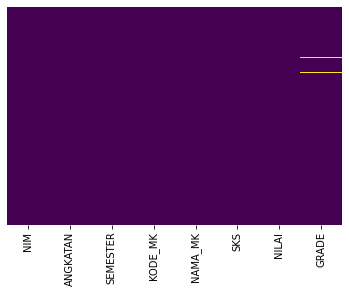

In [4]:
### misisng values
sns.heatmap(data_mahasiswa.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print('terdapat missing values di :',data_mahasiswa.isnull().sum(),sep='\n')

2015    4643
2014    4464
2013    3881
2011    3787
2010    3549
2016    3395
2017    3133
2018    2016
2012    2002
Name: ANGKATAN, dtype: int64


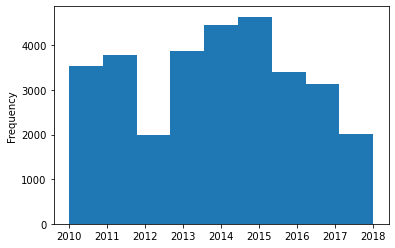

In [5]:
### Berapa angkatan yang terdapat di data ini ?
data_mahasiswa.ANGKATAN.plot(kind='hist',bins=len(data_mahasiswa.ANGKATAN.unique()))
print(data_mahasiswa.ANGKATAN.value_counts())


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRADE', ylabel='count'>

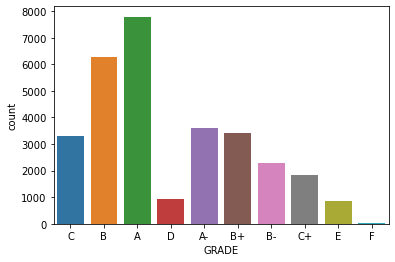

In [6]:
### Bagaimana distribusi data dari variabel 'GRADE' ?
sns.countplot(data_mahasiswa.GRADE)

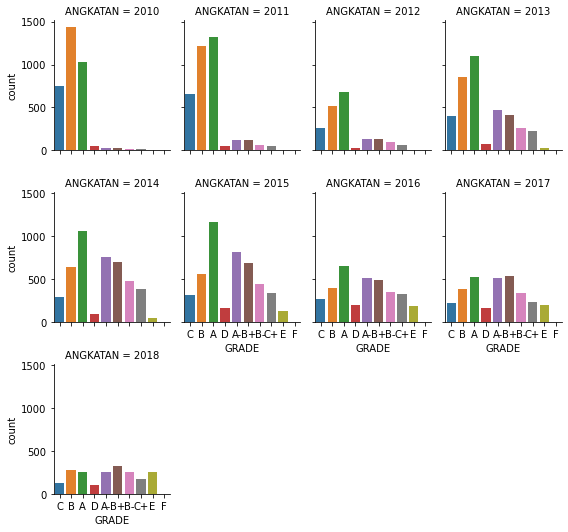

In [7]:
sns.catplot(x='GRADE',col='ANGKATAN',data=data_mahasiswa,kind='count',col_wrap=4,height=2.5, aspect=.8)

In [8]:
### Melakukan proses Mengisi missing data grade
from fillgrade import fillgrade
data_mahasiswa=fillgrade(data_mahasiswa.copy())

/Users/abilfad/Documents/lomba/Soal Babak Penyisihan Data Competition ISFEST 2022/fillgrade.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mahasiswa['GRADE'][i]  = 'C'
/Users/abilfad/Documents/lomba/Soal Babak Penyisihan Data Competition ISFEST 2022/fillgrade.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mahasiswa['GRADE'][i]  = 'B'
/Users/abilfad/Documents/lomba/Soal Babak Penyisihan Data Competition ISFEST 2022/fillgrade.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [9]:
### Melakukan proses Mengisi missing data nilai
from fillnilai import fillnilai
data_mahasiswa=fillnilai(data_mahasiswa.copy())

/Users/abilfad/Documents/lomba/Soal Babak Penyisihan Data Competition ISFEST 2022/fillnilai.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mahasiswa['NILAI'][i] = 55.
/Users/abilfad/Documents/lomba/Soal Babak Penyisihan Data Competition ISFEST 2022/fillnilai.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mahasiswa['NILAI'][i] = 70.
/Users/abilfad/Documents/lomba/Soal Babak Penyisihan Data Competition ISFEST 2022/fillnilai.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [10]:
### Apakah Nama MK yang masih kosong ?
data_mahasiswa.NAMA_MK.fillna('SI863 Tugas Akhir',inplace=True)
data_mahasiswa.isna().sum()
### sudah tidak ada yang kosong lagi hehe

NIM         0
ANGKATAN    0
SEMESTER    0
KODE_MK     0
NAMA_MK     0
SKS         0
NILAI       0
GRADE       0
dtype: int64

In [11]:
### Ada berapakah semester yang diadakan oleh Universitas
data_mahasiswa.SEMESTER.value_counts()

1811    2813
1821    2589
1711    2279
1721    2261
1611    2166
1621    2109
1521    2021
1511    2000
1411    1917
1421    1735
1311    1577
1321    1484
1221    1279
1211    1261
1121    1032
1111     940
1021     516
1011     455
1822     107
1722     103
1122      52
1322      45
1622      44
1222      30
1422      26
1022      13
1522      11
1911       5
Name: SEMESTER, dtype: int64

In [12]:
data_transkrip=data_mahasiswa[data_mahasiswa.ANGKATAN<=2015].copy()
data_transkrip

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,55.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,55.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,55.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,70.0,B
...,...,...,...,...,...,...,...,...
22321,12724,2015,1811,IS726,Inovasi Teknologi Informasi,3,85.0,A
22322,12724,2015,1811,IS782,Sistem & Aplikasi Perusahaan 3,3,75.0,B+
22323,12724,2015,1811,UM163,Kewarganegaraan,2,70.0,B
22324,12724,2015,1821,IS853,Magang Kerja,4,85.0,A


In [13]:
data_nilai= data_transkrip.pivot_table(index=['NIM','ANGKATAN','SEMESTER'], columns='KODE_MK', values='NILAI').copy().reset_index()
data_nilai_ = data_nilai.loc[:,'CE441':]
data_nilai=data_nilai.loc[:,'NIM':'SEMESTER']
I,J = data_nilai_.shape
for j in range(J):
    for i in range(I):
        if data_nilai_.iloc[i,j]!= np.nan:
            if data_nilai_.iloc[i,j]>=85:
                data_nilai_.iloc[i,j]='A'
            elif data_nilai_.iloc[i,j]>=80:
                data_nilai_.iloc[i,j]='A-'
            elif data_nilai_.iloc[i,j]>=75:
                data_nilai_.iloc[i,j]='B+'
            elif data_nilai_.iloc[i,j]>=70:
                data_nilai_.iloc[i,j]='B'
            elif data_nilai_.iloc[i,j]>=65:
                data_nilai_.iloc[i,j]='B-'
            elif data_nilai_.iloc[i,j]>=60:
                data_nilai_.iloc[i,j]='C+'
            elif data_nilai_.iloc[i,j]>=55:
                data_nilai_.iloc[i,j]='C'
            elif data_nilai_.iloc[i,j]>=45:
                data_nilai_.iloc[i,j]='D'
            elif data_nilai_.iloc[i,j]>=0:
                 data_nilai_.iloc[i,j]='E'
        else:
            continue

In [14]:
data_grade=pd.concat([data_nilai,data_nilai_],axis=1)
data_grade

KODE_MK,NIM,ANGKATAN,SEMESTER,CE441,CE551,CE651,CE751,EA100,EA201,EA410,...,UM141,UM142,UM151,UM152,UM160,UM162,UM163,UM222,UM223,UM321
0,8429,2015,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
1,8429,2015,1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,B+,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN
2,8429,2015,1611,C+,NaN,NaN,NaN,B-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A-,B,NaN,NaN,NaN
3,8429,2015,1621,NaN,NaN,NaN,NaN,NaN,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8429,2015,1711,NaN,NaN,NaN,NaN,NaN,NaN,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,14110310105,2014,1621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3908,14110310105,2014,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3909,14110310105,2014,1721,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B-
3910,14110310105,2014,1811,NaN,NaN,NaN,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN,NaN,NaN


In [15]:
data_nilai= data_transkrip.pivot_table(index=['NIM','ANGKATAN','SEMESTER'], columns='KODE_MK', values='NILAI').copy().reset_index()
data_nilai_ = data_nilai.loc[:,'CE441':]
data_nilai=data_nilai.loc[:,'NIM':'SEMESTER']
I,J = data_nilai_.shape
for j in range(J):
    for i in range(I):
        if data_nilai_.iloc[i,j]!= np.nan:
            if data_nilai_.iloc[i,j]>=85:
                data_nilai_.iloc[i,j]=4
            elif data_nilai_.iloc[i,j]>=80:
                data_nilai_.iloc[i,j]=3.7
            elif data_nilai_.iloc[i,j]>=75:
                data_nilai_.iloc[i,j]=3.3
            elif data_nilai_.iloc[i,j]>=70:
                data_nilai_.iloc[i,j]=3.0
            elif data_nilai_.iloc[i,j]>=65:
                data_nilai_.iloc[i,j]=2.7
            elif data_nilai_.iloc[i,j]>=60:
                data_nilai_.iloc[i,j]=2.3
            elif data_nilai_.iloc[i,j]>=55:
                data_nilai_.iloc[i,j]=2
            elif data_nilai_.iloc[i,j]>=45:
                data_nilai_.iloc[i,j]=1
            elif data_nilai_.iloc[i,j]>=0:
                 data_nilai_.iloc[i,j]=1
        else:
            continue

In [16]:
data_nilaisiswa=pd.concat([data_nilai,data_nilai_],axis=1)
data_nilaisiswa

KODE_MK,NIM,ANGKATAN,SEMESTER,CE441,CE551,CE651,CE751,EA100,EA201,EA410,...,UM141,UM142,UM151,UM152,UM160,UM162,UM163,UM222,UM223,UM321
0,8429,2015,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,8429,2015,1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2,8429,2015,1611,2.3,NaN,NaN,NaN,2.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.7,3.0,NaN,NaN,NaN
3,8429,2015,1621,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8429,2015,1711,NaN,NaN,NaN,NaN,NaN,NaN,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,14110310105,2014,1621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3908,14110310105,2014,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3909,14110310105,2014,1721,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7
3910,14110310105,2014,1811,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN


In [17]:
data_sks= data_transkrip.pivot_table(index=['NIM','ANGKATAN','SEMESTER'], columns='KODE_MK', values='SKS').copy()
data_sks.reset_index(inplace=True)
data_sks['sks_ambil']=data_sks.loc[:,'CE441':].copy().sum(axis=1)

In [18]:
data_ipk = data_sks.copy()
data_ips=data_ipk.loc[:,'CE441':'UM321']
I,J = data_ips.shape
for j in range(J):
    for i in range(I):
        if data_ips.iloc[i,j]!= np.nan:
            data_ips.iloc[i,j]=data_ips.iloc[i,j]*data_nilai_.iloc[i,j]


In [19]:
I,J = data_nilai_.shape
b = data_sks.loc[:,'CE441':'UM321'].copy()
b['sks_lulus']=1
for i in range(I):
    sks_lulus=0
    for j in range(J):
        if data_nilai_.iloc[i,j]>=2 and data_nilai_.iloc[i,j]!=np.nan :
            if b.iloc[i,j] != np.nan:
                print(b.iloc[i,j],sks_lulus)
                sks_lulus+=b.iloc[i,j]
            b['sks_lulus'].iloc[i]=sks_lulus
        else:
            continue


3.0 0
2.0 3.0
3.0 5.0
3.0 8.0
3.0 11.0
3.0 14.0
2.0 17.0
2.0 19.0
2.0 0
3.0 2.0
3.0 5.0
3.0 8.0
2.0 11.0
2.0 13.0
2.0 15.0
2.0 17.0
3.0 0
3.0 3.0
3.0 6.0
3.0 9.0
3.0 12.0
2.0 15.0
2.0 17.0
2.0 0
3.0 2.0
3.0 5.0
3.0 8.0
3.0 11.0
3.0 14.0
3.0 17.0
3.0 0
3.0 3.0
2.0 6.0
3.0 8.0
3.0 11.0
3.0 14.0
3.0 0
4.0 3.0
3.0 7.0
3.0 10.0
3.0 13.0
3.0 16.0
2.0 19.0
3.0 0
3.0 0
3.0 3.0
3.0 6.0
3.0 9.0
6.0 12.0
4.0 0
3.0 0
3.0 3.0
3.0 6.0
2.0 9.0
2.0 11.0
2.0 0
3.0 2.0
3.0 5.0
3.0 8.0
2.0 11.0
2.0 13.0
2.0 15.0
2.0 17.0
3.0 0
3.0 3.0
3.0 6.0
3.0 9.0
2.0 12.0
2.0 14.0
2.0 16.0
3.0 0
2.0 3.0
3.0 5.0
3.0 8.0
3.0 11.0
3.0 14.0
3.0 0
3.0 0
3.0 3.0
3.0 6.0
2.0 9.0
3.0 11.0
3.0 14.0
3.0 0
3.0 3.0
4.0 6.0
3.0 10.0
3.0 13.0
3.0 16.0
3.0 0
3.0 3.0
3.0 6.0
3.0 9.0
3.0 12.0
3.0 15.0
3.0 0
3.0 3.0
3.0 0
3.0 3.0
3.0 6.0
2.0 9.0
2.0 11.0
2.0 0
3.0 2.0
3.0 5.0
2.0 8.0
2.0 10.0
2.0 12.0
2.0 14.0
2.0 0
3.0 2.0
3.0 5.0
2.0 8.0
2.0 10.0
2.0 0
3.0 2.0
3.0 5.0
3.0 8.0
3.0 0
3.0 3.0
3.0 6.0
3.0 9.0
3.0 12.0
3.0 0
3.0 3.0
4.0 

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


 18.0
2.0 20.0
3.0 0
3.0 3.0
3.0 6.0
3.0 9.0
3.0 12.0
2.0 15.0
2.0 17.0
3.0 0
2.0 3.0
3.0 5.0
3.0 8.0
3.0 11.0
3.0 14.0
3.0 0
3.0 3.0
3.0 6.0
2.0 9.0
3.0 11.0
3.0 14.0
3.0 17.0
4.0 0
3.0 4.0
3.0 7.0
3.0 10.0
3.0 13.0
3.0 0
3.0 3.0
3.0 6.0
3.0 9.0
3.0 0
2.0 3.0
3.0 0
2.0 3.0
3.0 5.0
3.0 8.0
3.0 11.0
2.0 14.0
2.0 16.0
2.0 0
3.0 2.0
3.0 5.0
3.0 8.0
3.0 11.0
2.0 14.0
2.0 16.0
2.0 18.0
2.0 20.0
3.0 0
3.0 3.0
3.0 6.0
3.0 9.0
3.0 12.0
2.0 15.0
2.0 17.0
2.0 19.0
3.0 0
2.0 3.0
3.0 5.0
3.0 8.0
3.0 11.0
3.0 14.0
3.0 17.0
3.0 0
3.0 3.0
3.0 6.0
2.0 9.0
3.0 11.0
3.0 14.0
3.0 17.0
3.0 0
4.0 3.0
3.0 7.0
3.0 10.0
3.0 13.0
3.0 16.0
3.0 19.0
3.0 0
3.0 3.0
3.0 6.0
6.0 9.0
4.0 0
3.0 0
2.0 3.0
3.0 5.0
3.0 8.0
3.0 11.0
2.0 14.0
2.0 16.0
2.0 0
3.0 2.0
3.0 5.0
3.0 8.0
2.0 11.0
2.0 13.0
2.0 15.0
2.0 17.0
3.0 0
3.0 3.0
3.0 6.0
2.0 9.0
2.0 11.0
2.0 0
3.0 2.0
3.0 5.0
3.0 8.0
3.0 11.0
3.0 14.0
3.0 0
3.0 3.0
2.0 6.0
3.0 8.0
3.0 11.0
3.0 14.0
3.0 0
3.0 3.0
3.0 6.0
3.0 9.0
3.0 12.0
3.0 15.0
3.0 18.0
2.0 21.0
3.0 0
3.0

In [20]:
data_ipk['sks_lulus']=b['sks_lulus']
data_ipk

KODE_MK,NIM,ANGKATAN,SEMESTER,CE441,CE551,CE651,CE751,EA100,EA201,EA410,...,UM151,UM152,UM160,UM162,UM163,UM222,UM223,UM321,sks_ambil,sks_lulus
0,8429,2015,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,21
1,8429,2015,1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,19.0,19
2,8429,2015,1611,3.0,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,19.0,19
3,8429,2015,1621,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,20
4,8429,2015,1711,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,14110310105,2014,1621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16
3908,14110310105,2014,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,6
3909,14110310105,2014,1721,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,13.0,13
3910,14110310105,2014,1811,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,11.0,11


In [21]:
data_nilai_.shape

(3912, 137)

In [22]:
data_sks.shape

(3912, 141)

In [23]:
data_sks

KODE_MK,NIM,ANGKATAN,SEMESTER,CE441,CE551,CE651,CE751,EA100,EA201,EA410,...,UM142,UM151,UM152,UM160,UM162,UM163,UM222,UM223,UM321,sks_ambil
0,8429,2015,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0
1,8429,2015,1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,19.0
2,8429,2015,1611,3.0,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,19.0
3,8429,2015,1621,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
4,8429,2015,1711,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,14110310105,2014,1621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
3908,14110310105,2014,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
3909,14110310105,2014,1721,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,13.0
3910,14110310105,2014,1811,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,11.0


In [24]:
data_sks

KODE_MK,NIM,ANGKATAN,SEMESTER,CE441,CE551,CE651,CE751,EA100,EA201,EA410,...,UM142,UM151,UM152,UM160,UM162,UM163,UM222,UM223,UM321,sks_ambil
0,8429,2015,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0
1,8429,2015,1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,19.0
2,8429,2015,1611,3.0,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,19.0
3,8429,2015,1621,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
4,8429,2015,1711,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,14110310105,2014,1621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
3908,14110310105,2014,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
3909,14110310105,2014,1721,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,13.0
3910,14110310105,2014,1811,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,11.0


In [25]:
data_ips['ips']=data_ips.sum(axis=1)/data_sks.sks_ambil
data_ips


KODE_MK,CE441,CE551,CE651,CE751,EA100,EA201,EA410,EM100,EM180,EM190,...,UM142,UM151,UM152,UM160,UM162,UM163,UM222,UM223,UM321,ips
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,...,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3.176190
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.6,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,3.394737
2,6.9,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.4,6.0,NaN,NaN,NaN,2.915789
3,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.047826
4,NaN,NaN,NaN,NaN,NaN,NaN,11.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.958824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.568750
3908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.200000
3909,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.4,3.069231
3910,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,3.190909


In [26]:
"""for j in range(J-1):
    for i in range(I):
        if data_nilai_.iloc[i,j]!= np.nan:
            if data_nilai_.iloc[i,j]>=85:
                data_nilai_.iloc[i,j]='A'
            elif data_nilai_.iloc[i,j]>=80:
                data_nilai_.iloc[i,j]='A-'
            elif data_nilai_.iloc[i,j]>=75:
                data_nilai_.iloc[i,j]='B+'
            elif data_nilai_.iloc[i,j]>=70:
                data_nilai_.iloc[i,j]='B'
            elif data_nilai_.iloc[i,j]>=65:
                data_nilai_.iloc[i,j]='B-'
            elif data_nilai_.iloc[i,j]>=60:
                data_nilai_.iloc[i,j]='C+'
            elif data_nilai_.iloc[i,j]>=55:
                data_nilai_.iloc[i,j]='C'
            elif data_nilai_.iloc[i,j]>=45:
                data_nilai_.iloc[i,j]='D'
            elif data_nilai_.iloc[i,j]>=0:
                 data_nilai_.iloc[i,j]='E'
        else:
            continue"""

"for j in range(J-1):\n    for i in range(I):\n        if data_nilai_.iloc[i,j]!= np.nan:\n            if data_nilai_.iloc[i,j]>=85:\n                data_nilai_.iloc[i,j]='A'\n            elif data_nilai_.iloc[i,j]>=80:\n                data_nilai_.iloc[i,j]='A-'\n            elif data_nilai_.iloc[i,j]>=75:\n                data_nilai_.iloc[i,j]='B+'\n            elif data_nilai_.iloc[i,j]>=70:\n                data_nilai_.iloc[i,j]='B'\n            elif data_nilai_.iloc[i,j]>=65:\n                data_nilai_.iloc[i,j]='B-'\n            elif data_nilai_.iloc[i,j]>=60:\n                data_nilai_.iloc[i,j]='C+'\n            elif data_nilai_.iloc[i,j]>=55:\n                data_nilai_.iloc[i,j]='C'\n            elif data_nilai_.iloc[i,j]>=45:\n                data_nilai_.iloc[i,j]='D'\n            elif data_nilai_.iloc[i,j]>=0:\n                 data_nilai_.iloc[i,j]='E'\n        else:\n            continue"

1+np.nan

In [27]:
1+np.nan

nan

In [28]:
data_ipk['ipk']=data_ips.ips.copy()

In [29]:
data_ipk


KODE_MK,NIM,ANGKATAN,SEMESTER,CE441,CE551,CE651,CE751,EA100,EA201,EA410,...,UM152,UM160,UM162,UM163,UM222,UM223,UM321,sks_ambil,sks_lulus,ipk
0,8429,2015,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,21,3.176190
1,8429,2015,1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,19.0,19,3.394737
2,8429,2015,1611,3.0,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,19.0,19,2.915789
3,8429,2015,1621,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,20,3.047826
4,8429,2015,1711,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17,2.958824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,14110310105,2014,1621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16,3.568750
3908,14110310105,2014,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,6,2.200000
3909,14110310105,2014,1721,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,13.0,13,3.069231
3910,14110310105,2014,1811,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,11.0,11,3.190909


In [30]:
data_amatan = data_ipk.loc[:,['NIM','ANGKATAN','SEMESTER','sks_ambil','sks_lulus','ipk']].copy()

In [31]:
nim=data_amatan['NIM'].unique()

In [32]:
data_amatan['lama_semester']=0
semester_total = 0
for n in nim:
    semester_total = (len(data_amatan[data_amatan['NIM']==n]))
    data_amatan.loc[data_amatan['NIM']==n,'lama_semester']=semester_total
    semester_total=0

In [33]:
data_amatan[data_amatan['NIM']==8429]

KODE_MK,NIM,ANGKATAN,SEMESTER,sks_ambil,sks_lulus,ipk,lama_semester
0,8429,2015,1511,21.0,21,3.176190,9
1,8429,2015,1521,19.0,19,3.394737,9
2,8429,2015,1611,19.0,19,2.915789,9
3,8429,2015,1621,23.0,20,3.047826,9
4,8429,2015,1711,17.0,17,2.958824,9
5,8429,2015,1721,21.0,21,3.585714,9
6,8429,2015,1722,3.0,3,2.700000,9
7,8429,2015,1811,18.0,18,3.783333,9
8,8429,2015,1821,4.0,4,4.000000,9


In [34]:
data_amatan_train = data_amatan[data_amatan['ANGKATAN']<=2014].copy()
data_amatan_test = data_amatan[data_amatan['ANGKATAN']>2014].copy()

In [35]:
data_amatan_train

KODE_MK,NIM,ANGKATAN,SEMESTER,sks_ambil,sks_lulus,ipk,lama_semester
826,10110310002,2010,1011,21.0,21,2.428571,9
827,10110310002,2010,1021,21.0,21,2.380952,9
828,10110310002,2010,1111,15.0,15,3.333333,9
829,10110310002,2010,1121,18.0,18,2.555556,9
830,10110310002,2010,1211,21.0,21,2.714286,9
...,...,...,...,...,...,...,...
3907,14110310105,2014,1621,16.0,16,3.568750,10
3908,14110310105,2014,1711,9.0,6,2.200000,10
3909,14110310105,2014,1721,13.0,13,3.069231,10
3910,14110310105,2014,1811,11.0,11,3.190909,10


In [36]:
data_amatan.to_csv('data_amatan.csv',index=False)
data_amatan.columns

Index(['NIM', 'ANGKATAN', 'SEMESTER', 'sks_ambil', 'sks_lulus', 'ipk',
       'lama_semester'],
      dtype='object', name='KODE_MK')

In [37]:
lama_studi = data_amatan.copy()
lama_studi = lama_studi[['NIM','ANGKATAN','lama_semester','sks_ambil','sks_lulus','ipk']]
lama_studi = lama_studi.groupby(['NIM','ANGKATAN'],as_index=False).agg({'sks_ambil':'sum','sks_lulus':'sum','ipk':'mean','lama_semester':'max'})
lama_studi[lama_studi['lama_semester']<=9]
lama_studi['tepat_waktu']=0
I,J = lama_studi.shape
for i in range(I):
    if lama_studi.loc[i,'lama_semester']<=8:
        if lama_studi.loc[i,'sks_lulus']>=144 and lama_studi.loc[i,'ipk']>=2.5:
            lama_studi.loc[i,'tepat_waktu']=1
        else:
            lama_studi.loc[i,'tepat_waktu']=0
    else:
        lama_studi.loc[i,'tepat_waktu']=0
lama_studi.to_csv('lama_studi.csv',index=False)
lama_studi
lama_studi.to_csv('lama_studi.csv',index=False)
        

In [38]:
tahun = np.sort(np.array(data_amatan.ANGKATAN.unique()))
data_2010 = data_amatan[data_amatan['ANGKATAN']==tahun[0]].copy()
data_2011 = data_amatan[data_amatan['ANGKATAN']==tahun[1]].copy()
data_2012 = data_amatan[data_amatan['ANGKATAN']==tahun[2]].copy()
data_2013 = data_amatan[data_amatan['ANGKATAN']==tahun[3]].copy()
data_2014 = data_amatan[data_amatan['ANGKATAN']==tahun[4]].copy()
data_2015 = data_amatan[data_amatan['ANGKATAN']==tahun[5]].copy()

In [39]:
data_amatan[data_amatan['NIM']==8429]

KODE_MK,NIM,ANGKATAN,SEMESTER,sks_ambil,sks_lulus,ipk,lama_semester
0,8429,2015,1511,21.0,21,3.176190,9
1,8429,2015,1521,19.0,19,3.394737,9
2,8429,2015,1611,19.0,19,2.915789,9
3,8429,2015,1621,23.0,20,3.047826,9
4,8429,2015,1711,17.0,17,2.958824,9
5,8429,2015,1721,21.0,21,3.585714,9
6,8429,2015,1722,3.0,3,2.700000,9
7,8429,2015,1811,18.0,18,3.783333,9
8,8429,2015,1821,4.0,4,4.000000,9


In [40]:
data2010 = data_2010.pivot_table(index=['NIM','ANGKATAN'], columns='SEMESTER', values='ipk').copy()
data2010.reset_index(inplace=True)
data2010

SEMESTER,NIM,ANGKATAN,1011,1021,1022,1111,1121,1122,1211,1221,1222,1311,1321,1322,1411,1421,1422,1511,1521,1621
0,10110310002,2010,2.428571,2.380952,NaN,3.333333,2.555556,NaN,2.714286,3.571429,NaN,3.062500,4.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10110310004,2010,2.230769,2.263158,NaN,3.000000,3.066667,3.0,3.000000,2.950000,3.0,3.294118,3.000000,NaN,3.700000,3.3,NaN,NaN,NaN,NaN
2,10110310005,2010,3.714286,3.476190,NaN,3.904762,3.619048,NaN,3.714286,3.857143,NaN,3.538462,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10110310006,2010,2.571429,2.523810,NaN,2.952381,2.571429,NaN,2.857143,3.571429,NaN,3.538462,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10110310007,2010,2.666667,2.142857,NaN,3.000000,2.777778,NaN,2.714286,3.619048,NaN,3.062500,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,10110310080,2010,2.400000,2.526316,2.0,2.444444,2.470588,NaN,2.600000,3.277778,2.0,2.666667,3.090909,3.0,NaN,3.0,NaN,NaN,NaN,NaN
60,10110310081,2010,2.750000,2.857143,2.0,3.095238,3.285714,4.0,3.142857,3.857143,NaN,3.538462,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,10110310083,2010,3.285714,2.684211,NaN,2.900000,3.200000,NaN,2.750000,3.333333,NaN,3.333333,3.400000,NaN,3.433333,NaN,NaN,NaN,NaN,NaN
62,10110310101,2010,2.250000,3.312500,2.0,2.750000,3.272727,NaN,2.166667,3.294118,NaN,2.666667,2.733333,2.6,2.171429,3.1,NaN,NaN,NaN,NaN


In [50]:
data2011 = data_2011.pivot_table(index=['NIM','ANGKATAN'], columns='SEMESTER', values='ipk').copy()
data2011.reset_index(inplace=True)
data2011

SEMESTER,NIM,ANGKATAN,1111,1121,1122,1211,1221,1222,1311,1321,...,1421,1422,1511,1521,1522,1611,1621,1711,1721,1722
0,11110310001,2011,2.571429,2.571429,NaN,2.666667,2.809524,NaN,3.333333,3.238095,...,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11110310002,2011,2.761905,2.619048,NaN,2.809524,3.190476,NaN,3.142857,3.571429,...,3.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11110310003,2011,3.142857,3.285714,NaN,3.476190,3.708333,NaN,3.714286,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11110310004,2011,2.857143,3.095238,NaN,3.047619,3.875000,NaN,3.571429,3.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11110310005,2011,2.428571,2.888889,NaN,2.833333,2.571429,3.0,2.714286,3.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,11110310093,2011,NaN,2.611111,NaN,2.000000,2.888889,NaN,2.583333,2.789474,...,3.111765,3.3,2.875000,3.700000,NaN,3.300000,3.3,NaN,NaN,NaN
64,11110310094,2011,NaN,2.727273,NaN,2.062500,3.235294,NaN,2.500000,3.538462,...,3.000000,3.7,3.441176,2.860000,NaN,3.350000,3.4,NaN,NaN,NaN
65,11110310095,2011,NaN,3.100000,NaN,2.826087,3.111111,NaN,2.714286,3.444444,...,3.930769,NaN,3.610000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
66,11110310096,2011,NaN,2.000000,NaN,2.478261,3.400000,NaN,2.000000,3.157895,...,3.728571,NaN,3.868750,3.700000,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data2012 = data_2012.pivot_table(index=['NIM','ANGKATAN'], columns='SEMESTER', values='ipk').copy()
data2012.reset_index(inplace=True)
data2012

SEMESTER,NIM,ANGKATAN,1211,1221,1222,1311,1321,1322,1411,1421,1422,1511,1521,1522,1611,1621,1711,1721,1811,1821
0,12110310001,2012,2.952381,3.142857,NaN,2.809524,2.761905,NaN,3.057143,3.171429,NaN,2.900000,NaN,NaN,3.820000,NaN,NaN,NaN,NaN,NaN
1,12110310003,2012,3.714286,3.809524,NaN,3.761905,3.750000,NaN,3.771429,3.850000,NaN,3.778947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12110310004,2012,3.380952,3.666667,NaN,3.523810,3.625000,NaN,3.614286,3.683333,NaN,3.607692,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12110310006,2012,2.375000,2.947368,3.0,2.111111,2.476190,NaN,3.116667,3.022222,NaN,2.742105,4.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
4,12110310008,2012,3.714286,3.904762,NaN,3.857143,4.000000,NaN,4.000000,3.957143,NaN,3.930769,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,12110310009,2012,3.666667,3.857143,NaN,3.476190,3.571429,NaN,3.585714,3.628571,NaN,3.515385,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12110310010,2012,3.238095,3.761905,NaN,2.619048,3.238095,NaN,3.528571,3.600000,NaN,3.676923,3.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12110310011,2012,2.222222,2.809524,NaN,2.846154,2.476190,NaN,2.933333,3.233333,2.7,2.975000,3.230769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12110310014,2012,3.190476,3.476190,NaN,3.142857,3.142857,NaN,3.228571,3.233333,NaN,3.400000,3.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,12110310016,2012,2.600000,3.315789,3.0,2.466667,2.904762,NaN,3.100000,2.957143,2.7,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
data2013 = data_2013.pivot_table(index=['NIM','ANGKATAN'], columns='SEMESTER', values='ipk').copy()
data2013.reset_index(inplace=True)
data2013

SEMESTER,NIM,ANGKATAN,1311,1321,1322,1411,1421,1422,1511,1521,...,1611,1621,1622,1711,1721,1722,1811,1821,1822,1911
0,13110310001,2013,3.142857,3.095238,NaN,2.938095,3.220000,NaN,2.650000,3.300000,...,3.425000,3.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13110310002,2013,3.714286,3.714286,NaN,3.685714,3.790000,NaN,3.685714,3.857143,...,4.000000,3.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13110310003,2013,3.761905,3.666667,NaN,3.714286,3.880000,NaN,4.000000,3.914286,...,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13110310004,2013,3.238095,3.190476,NaN,3.471429,3.820000,NaN,3.900000,3.814286,...,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13110310005,2013,2.952381,2.714286,NaN,3.104762,3.520000,NaN,3.714286,3.671429,...,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,13110310082,2013,NaN,2.521739,NaN,2.681818,3.183333,NaN,3.000000,2.918182,...,3.100000,3.611111,2.0,2.427273,2.0,NaN,3.4,NaN,NaN,NaN
74,13110310084,2013,NaN,3.625000,NaN,2.873333,3.282609,NaN,3.216667,3.236364,...,3.318182,3.769231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,13110310085,2013,NaN,3.300000,3.0,2.946667,3.265000,NaN,3.183333,3.295000,...,3.214286,3.626316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,13110310086,2013,NaN,3.218750,NaN,2.966667,3.310000,NaN,3.585714,3.604545,...,3.778947,3.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data2014 = data_2014.pivot_table(index=['NIM','ANGKATAN'], columns='SEMESTER', values='ipk').copy()
data2014.reset_index(inplace=True)
data2014

SEMESTER,NIM,ANGKATAN,1411,1421,1511,1521,1522,1611,1621,1622,1711,1721,1722,1811,1821,1822
0,14110310001,2014,2.580952,2.972727,2.550000,3.105882,NaN,2.647059,3.250000,NaN,2.940000,2.700000,NaN,3.250000,NaN,NaN
1,14110310002,2014,3.369565,3.422727,3.375000,3.582609,NaN,3.569565,3.790476,NaN,4.000000,4.000000,NaN,NaN,NaN,NaN
2,14110310003,2014,3.834783,3.777273,3.655000,3.930000,NaN,4.000000,4.000000,NaN,4.000000,4.000000,NaN,NaN,NaN,NaN
3,14110310004,2014,3.882609,3.613636,3.475000,3.795000,NaN,3.621739,3.900000,NaN,4.000000,4.000000,NaN,NaN,NaN,NaN
4,14110310005,2014,2.531250,3.020000,2.475000,3.060000,NaN,2.000000,3.264286,NaN,3.260000,2.354545,NaN,2.822222,2.571429,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,14110310095,2014,3.005000,3.272727,3.090000,2.717647,NaN,3.045455,3.716667,NaN,3.756250,3.700000,NaN,3.300000,NaN,NaN
84,14110310098,2014,3.252174,3.286364,2.716667,3.457895,NaN,3.294118,3.686364,NaN,2.457143,3.000000,NaN,3.128571,NaN,NaN
85,14110310101,2014,2.607692,3.000000,3.075000,3.564706,NaN,3.064706,3.590909,NaN,3.123529,2.800000,NaN,3.333333,3.700000,NaN
86,14110310102,2014,2.734783,3.068182,1.963636,3.150000,NaN,2.400000,3.146154,NaN,2.850000,3.300000,NaN,3.175000,1.945455,NaN


In [54]:
data2015 = data_2015.pivot_table(index=['NIM','ANGKATAN'], columns='SEMESTER', values='ipk').copy()
data2015.reset_index(inplace=True)
data2015

SEMESTER,NIM,ANGKATAN,1511,1521,1611,1621,1622,1711,1721,1722,1811,1821,1822,1911
0,8429,2015,3.176190,3.394737,2.915789,3.047826,NaN,2.958824,3.585714,2.7,3.783333,4.000000,NaN,NaN
1,8455,2015,2.775000,3.026316,2.700000,3.082353,3.7,2.695000,3.589474,NaN,3.450000,3.000000,NaN,NaN
2,8481,2015,2.125000,2.931250,2.366667,2.828571,NaN,2.400000,2.972222,3.0,2.820000,1.720000,NaN,NaN
3,8631,2015,3.452381,3.540909,3.826316,3.579167,NaN,3.439130,3.660000,NaN,3.625000,NaN,NaN,NaN
4,8684,2015,3.509524,3.504545,3.533333,3.655000,NaN,3.310000,3.550000,NaN,3.668421,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,12493,2015,2.495238,2.993750,2.756250,2.805882,NaN,2.509091,3.761905,3.0,2.800000,2.900000,NaN,NaN
92,12510,2015,3.052941,3.000000,2.181818,3.311765,NaN,3.233333,3.011765,3.3,3.519048,3.769231,3.7,NaN
93,12575,2015,3.538095,3.509091,3.205263,3.540909,NaN,3.647826,3.952632,NaN,3.660000,4.000000,NaN,NaN
94,12700,2015,3.300000,3.572727,3.264706,3.310526,NaN,3.550000,3.690476,NaN,3.716667,4.000000,NaN,NaN


In [73]:
df_final = pd.concat([data2010,data2011,data2012,data2013,data2014,data2015],axis=0)
df_final

SEMESTER,NIM,ANGKATAN,1011,1021,1022,1111,1121,1122,1211,1221,...,1522,1611,1711,1721,1722,1811,1821,1622,1822,1911
0,10110310002,2010,2.428571,2.380952,NaN,3.333333,2.555556,NaN,2.714286,3.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10110310004,2010,2.230769,2.263158,NaN,3.000000,3.066667,3.0,3.000000,2.950000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10110310005,2010,3.714286,3.476190,NaN,3.904762,3.619048,NaN,3.714286,3.857143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10110310006,2010,2.571429,2.523810,NaN,2.952381,2.571429,NaN,2.857143,3.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10110310007,2010,2.666667,2.142857,NaN,3.000000,2.777778,NaN,2.714286,3.619048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,12493,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.756250,2.509091,3.761905,3.0,2.800000,2.900000,NaN,NaN,NaN
92,12510,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.181818,3.233333,3.011765,3.3,3.519048,3.769231,NaN,3.7,NaN
93,12575,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.205263,3.647826,3.952632,NaN,3.660000,4.000000,NaN,NaN,NaN
94,12700,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.264706,3.550000,3.690476,NaN,3.716667,4.000000,NaN,NaN,NaN


In [74]:
lama_studi.loc[:,['NIM','lama_semester','sks_ambil','sks_lulus','ipk']]

KODE_MK,NIM,lama_semester,sks_ambil,sks_lulus,ipk
0,8429,9,145.0,142,3.284713
1,8455,9,136.0,130,3.113127
2,8481,9,127.0,106,2.573746
3,8631,7,145.0,145,3.588986
4,8684,7,145.0,145,3.532975
...,...,...,...,...,...
429,14110310095,9,145.0,139,3.289305
430,14110310098,9,145.0,142,3.142144
431,14110310101,10,138.0,138,3.185988
432,14110310102,10,133.0,124,2.773321


In [79]:
df_final=df_final.join(lama_studi.loc[:,['NIM','lama_semester','sks_ambil','sks_lulus','ipk','tepat_waktu']].set_index('NIM'),on='NIM',how='left')
df_final.to_csv('df_final.csv',index=False)

In [80]:
df_final

,NIM,ANGKATAN,1011,1021,1022,1111,1121,1122,1211,1221,...,1811,1821,1622,1822,1911,lama_semester,sks_ambil,sks_lulus,ipk,tepat_waktu
0,10110310002,2010,2.428571,2.380952,NaN,3.333333,2.555556,NaN,2.714286,3.571429,...,NaN,NaN,NaN,NaN,NaN,9,145.0,143,2.782959,0
1,10110310004,2010,2.230769,2.263158,NaN,3.000000,3.066667,3.0,3.000000,2.950000,...,NaN,NaN,NaN,NaN,NaN,12,145.0,139,2.983726,0
2,10110310005,2010,3.714286,3.476190,NaN,3.904762,3.619048,NaN,3.714286,3.857143,...,NaN,NaN,NaN,NaN,NaN,8,145.0,145,3.728022,1
3,10110310006,2010,2.571429,2.523810,NaN,2.952381,2.571429,NaN,2.857143,3.571429,...,NaN,NaN,NaN,NaN,NaN,8,145.0,143,3.073260,0
4,10110310007,2010,2.666667,2.142857,NaN,3.000000,2.777778,NaN,2.714286,3.619048,...,NaN,NaN,NaN,NaN,NaN,8,145.0,143,2.872892,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,12493,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.800000,2.900000,NaN,NaN,NaN,9,129.0,123,2.891346,0
92,12510,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.519048,3.769231,NaN,3.7,NaN,10,130.0,124,3.207990,0
93,12575,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660000,4.000000,NaN,NaN,NaN,8,145.0,145,3.631727,1
94,12700,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.716667,4.000000,NaN,NaN,NaN,8,145.0,145,3.550638,1
